In [1]:
import pandas as pd
import numpy as np
import json as js
import pymove as pm

from pymove import MoveDataFrame
from pymove import segmentation

In [2]:
df = pd.read_csv('data/df_tdrive_ALL-taxis.csv') # df obtido em --> Extracao_Tdrive.ipynb
df

,tax_id,lon,lat,time
0,7254,116.29516,39.92672,2008-02-02 13:38:14
1,7254,116.27879,39.92312,2008-02-02 13:43:17
2,7254,116.28954,39.93976,2008-02-02 14:13:43
3,7254,116.27275,39.92319,2008-02-02 14:18:43
4,7254,116.25630,39.90627,2008-02-02 14:23:43
...,...,...,...,...
17662979,7798,116.29040,39.91553,2008-02-08 17:01:11
17662980,7798,116.19082,39.83038,2008-02-08 17:06:34
17662981,7798,116.19098,39.83092,2008-02-08 17:16:33
17662982,7798,116.19052,39.83028,2008-02-08 17:26:33


In [3]:
move_df = MoveDataFrame(data=df, latitude="lat", longitude="lon", datetime="time", traj_id="tax_id")
del df
move_df

,id,lon,lat,datetime
0,7254,116.29516,39.92672,2008-02-02 13:38:14
1,7254,116.27879,39.92312,2008-02-02 13:43:17
2,7254,116.28954,39.93976,2008-02-02 14:13:43
3,7254,116.27275,39.92319,2008-02-02 14:18:43
4,7254,116.25630,39.90627,2008-02-02 14:23:43
...,...,...,...,...
17662979,7798,116.29040,39.91553,2008-02-08 17:01:11
17662980,7798,116.19082,39.83038,2008-02-08 17:06:34
17662981,7798,116.19098,39.83092,2008-02-08 17:16:33
17662982,7798,116.19052,39.83028,2008-02-08 17:26:33


In [4]:
# Qtde de pontos de cada traj (id)
lengs_trajs_tax = move_df['id'].value_counts()
lengs_trajs_tax # deixe o mouse em cima para visualizar o histograma

6275     154688
3015     145812
3557     121667
3579     101843
366       99494
          ...  
7359          1
6425          1
10240         1
3243          1
9749          1
Name: id, Length: 10336, dtype: int64

In [5]:
len(lengs_trajs_tax)

10336

Qtde de trajs: 10336
Comprimento máximo: 154688
Comprimento médio: 1708.8800309597523
Mediana: 1399.0
Comprimento mínimo: 1


<AxesSubplot:>

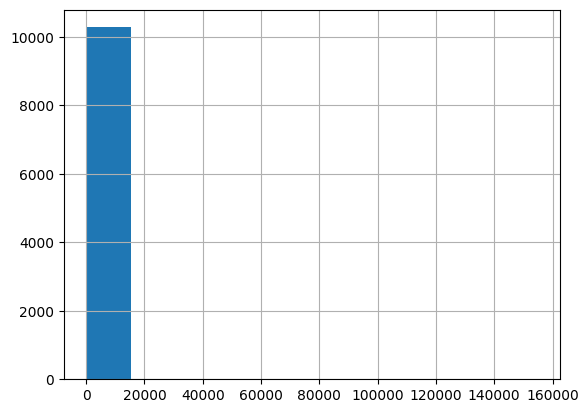

In [6]:
print('Qtde de trajs:', len(lengs_trajs_tax))
print('Comprimento máximo:', lengs_trajs_tax.max())
print('Comprimento médio:', lengs_trajs_tax.mean())
print('Mediana:', lengs_trajs_tax.median())
print('Comprimento mínimo:', lengs_trajs_tax.min())
lengs_trajs_tax.hist()

In [7]:
%%time
# Segmentando trajs pelo intervalo de tempo entre pontos adjacentes. Se o intervalo entre 2 pontos adjacentes for maior que 5min (300s), segmenta-se a traj!
mv = pm.preprocessing.segmentation.by_max_time(move_df, label_id='id', max_time_between_adj_points=300)

CPU times: user 1h 31min 42s, sys: 22min 2s, total: 1h 53min 45s
Wall time: 1h 53min 45s


In [8]:
mv

,id,lon,lat,datetime,dist_to_prev,time_to_prev,speed_to_prev,tid_time
0,7254,116.29516,39.92672,2008-02-02 13:38:14,NaN,NaN,NaN,1
1,7254,116.27879,39.92312,2008-02-02 13:43:17,1452.194842,303.0,4.792722,2
2,7254,116.28954,39.93976,2008-02-02 14:13:43,2064.876942,1826.0,1.130820,3
3,7254,116.27275,39.92319,2008-02-02 14:18:43,2333.305644,300.0,7.777685,3
4,7254,116.25630,39.90627,2008-02-02 14:23:43,2346.921543,300.0,7.823072,3
...,...,...,...,...,...,...,...,...
17662979,7798,116.29040,39.91553,2008-02-08 17:01:11,12708.247773,278.0,45.713121,3165449
17662980,7798,116.19082,39.83038,2008-02-08 17:06:34,12722.572891,323.0,39.388771,3165450
17662981,7798,116.19098,39.83092,2008-02-08 17:16:33,61.580025,599.0,0.102805,3165451
17662982,7798,116.19052,39.83028,2008-02-08 17:26:33,81.285527,600.0,0.135476,3165452


In [9]:
#mv.to_csv('mv_t60.csv', index=False)

In [10]:
#mv = pm.read_csv('mv_t60.csv')

In [11]:
# Qtde de pontos de cada traj (id)
lengs_trajs_tt = mv['tid_time'].value_counts()
lengs_trajs_tt # deixe o mouse em cima para visualizar o histograma

2034412    32868
381214     32862
2034411    31296
1374879    29010
827521     24573
           ...  
1295703        1
1295704        1
1295705        1
1295706        1
3165453        1
Name: tid_time, Length: 3165453, dtype: int64

In [12]:
%%time
# Removendo pontos duplicados!
mv = pm.preprocessing.filters.clean_consecutive_duplicates(mv, subset=['lon', 'lat', 'tid_time'])
mv

CPU times: user 1.17 s, sys: 376 ms, total: 1.55 s
Wall time: 1.54 s


,id,lon,lat,datetime,dist_to_prev,time_to_prev,speed_to_prev,tid_time
0,7254,116.29516,39.92672,2008-02-02 13:38:14,NaN,NaN,NaN,1
1,7254,116.27879,39.92312,2008-02-02 13:43:17,1452.194842,303.0,4.792722,2
2,7254,116.28954,39.93976,2008-02-02 14:13:43,2064.876942,1826.0,1.130820,3
3,7254,116.27275,39.92319,2008-02-02 14:18:43,2333.305644,300.0,7.777685,3
4,7254,116.25630,39.90627,2008-02-02 14:23:43,2346.921543,300.0,7.823072,3
...,...,...,...,...,...,...,...,...
17662979,7798,116.29040,39.91553,2008-02-08 17:01:11,12708.247773,278.0,45.713121,3165449
17662980,7798,116.19082,39.83038,2008-02-08 17:06:34,12722.572891,323.0,39.388771,3165450
17662981,7798,116.19098,39.83092,2008-02-08 17:16:33,61.580025,599.0,0.102805,3165451
17662982,7798,116.19052,39.83028,2008-02-08 17:26:33,81.285527,600.0,0.135476,3165452


In [13]:
# Qtde de pontos de cada traj (id)
lengs_trajs_tt = mv['tid_time'].value_counts()
lengs_trajs_tt

381214     19453
827521     15789
2064382    15643
2064383    13741
2064380    13434
           ...  
1248846        1
1248847        1
1248848        1
1248849        1
3165453        1
Name: tid_time, Length: 3165453, dtype: int64

Qtde de trajs: 3165453
Comprimento máximo: 19453
Comprimento médio: 4.413102010991792
Mediana: 1.0
Comprimento mínimo: 1


<AxesSubplot:>

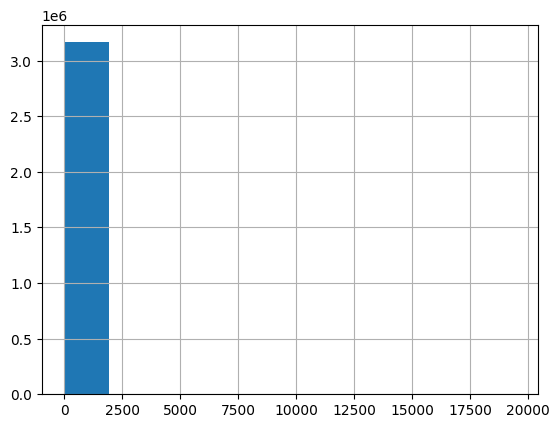

In [14]:
print('Qtde de trajs:', len(lengs_trajs_tt))
print('Comprimento máximo:', lengs_trajs_tt.max())
print('Comprimento médio:', lengs_trajs_tt.mean())
print('Mediana:', lengs_trajs_tt.median())
print('Comprimento mínimo:', lengs_trajs_tt.min())
lengs_trajs_tt.hist()

In [15]:
# Pegando as trajs que têm menos de 5 pontos:
trajs2drop = []
for i in range(len(lengs_trajs_tt)):
  if lengs_trajs_tt.iloc[i] < 5:
    trajs2drop.append(lengs_trajs_tt.index[i])

In [17]:
print('Total de trajs:', len(lengs_trajs_tt))
print('Trajs < 5:', len(trajs2drop))

Total de trajs: 3165453
Trajs < 5: 2713613


In [18]:
print('Num total de trajs que deverão sobrar:', len(lengs_trajs_tt) - len(trajs2drop))

Num total de trajs que deverão sobrar: 451840


In [19]:
# Removendo as trajs < 5 pontos:
mv = mv[~mv['tid_time'].isin(trajs2drop)]

In [20]:
print('Realmente sobrou:', len(mv['tid_time'].unique()))

Realmente sobrou: 451840


In [21]:
# Qtde de pontos de cada traj:
lengs_trajs_tt = mv['tid_time'].value_counts()
lengs_trajs_tt

381214     19453
827521     15789
2064382    15643
2064383    13741
2064380    13434
           ...  
1280151        5
2069882        5
987965         5
2069869        5
2751286        5
Name: tid_time, Length: 451840, dtype: int64

Qtde de trajs: 451840
Comprimento máximo: 19453
Comprimento médio: 22.980698919971672
Mediana: 11.0
Comprimento mínimo: 5


<AxesSubplot:>

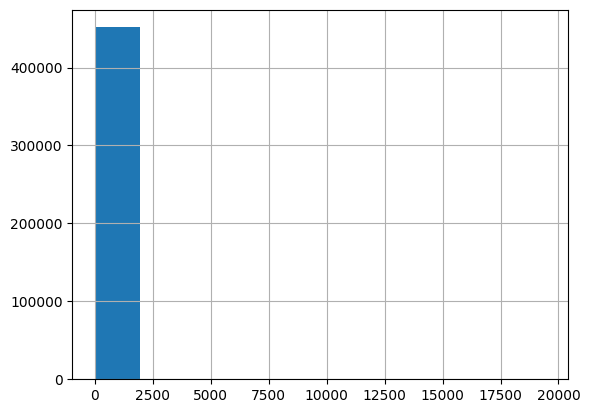

In [22]:
print('Qtde de trajs:', len(lengs_trajs_tt))
print('Comprimento máximo:', lengs_trajs_tt.max())
print('Comprimento médio:', lengs_trajs_tt.mean())
print('Mediana:', lengs_trajs_tt.median())
print('Comprimento mínimo:', lengs_trajs_tt.min())
lengs_trajs_tt.hist()

In [23]:
mv.to_csv('data/mv.csv', index=False)

## SEGMENTANDO AS QUE TEM MAIS DE 50 PONTOS:

In [83]:
mv = pm.read_csv('data/mv.csv')
mv

,id,lon,lat,datetime,dist_to_prev,time_to_prev,speed_to_prev,tid_time
0,7254,116.21163,39.89811,2008-02-02 23:13:38,5.118434,302.0,0.016948,21
1,7254,116.21168,39.89804,2008-02-02 23:18:38,8.875723,300.0,0.029586,21
2,7254,116.21164,39.89806,2008-02-02 23:23:38,4.073016,300.0,0.013577,21
3,7254,116.21171,39.89782,2008-02-02 23:28:38,27.346726,300.0,0.091156,21
4,7254,116.21178,39.89770,2008-02-02 23:33:38,14.618664,300.0,0.048729,21
...,...,...,...,...,...,...,...,...
10383594,10141,117.21510,40.16480,2008-02-08 12:51:05,493.221289,180.0,2.740118,3163275
10383595,10141,117.21813,40.15331,2008-02-08 12:53:29,1303.319154,144.0,9.050827,3163275
10383596,10141,117.22108,40.15389,2008-02-08 12:56:07,258.877704,158.0,1.638466,3163275
10383597,10141,117.22113,40.15393,2008-02-08 12:58:31,6.151445,144.0,0.042718,3163275


In [84]:
mv.loc[mv['tid_time'] == 3163274] # tid=3163274 tem 67 pontos

,id,lon,lat,datetime,dist_to_prev,time_to_prev,speed_to_prev,tid_time
10383519,10141,116.49705,39.97453,2008-02-08 09:32:15,319.922958,43113.0,0.007421,3163274
10383520,10141,116.49695,39.97368,2008-02-08 09:37:16,94.899036,135.0,0.702956,3163274
10383521,10141,116.48579,39.97065,2008-02-08 09:40:03,1008.917592,167.0,6.041423,3163274
10383522,10141,116.48485,39.96201,2008-02-08 09:42:18,964.058277,135.0,7.141172,3163274
10383523,10141,116.48142,39.95626,2008-02-08 09:45:05,703.035930,167.0,4.209796,3163274
...,...,...,...,...,...,...,...,...
10383581,10141,117.10477,40.18153,2008-02-08 12:13:07,1534.518448,135.0,11.366803,3163274
10383582,10141,117.11686,40.19171,2008-02-08 12:15:54,1528.427716,167.0,9.152262,3163274
10383583,10141,117.14653,40.19745,2008-02-08 12:18:09,2599.651198,135.0,19.256676,3163274
10383584,10141,117.17865,40.20536,2008-02-08 12:20:56,2866.193561,167.0,17.162836,3163274


In [85]:
# Função para criar grupos de trajs com 50 pontos
def criar_grupos(row):
    if row['count'] > 50:
        return f"{row['tid_time']}_{row['group']}"
    else:
        return str(row['tid_time'])

In [86]:
# Contagem de linhas por trajetória
mv['group'] = mv.groupby('tid_time').cumcount() // 50 + 1

In [87]:
# Contagem de linhas por trajetória
mv['count'] = mv.groupby('tid_time')['lon'].transform('count')

In [88]:
mv.loc[mv['tid_time'] == 3163274] 
# Como podemos notar, para a tid 3163274, foram criados dois grupos: grupo 1 com 50 pts, grupo 2 com 17 pts!

,id,lon,lat,datetime,dist_to_prev,time_to_prev,speed_to_prev,tid_time,group,count
10383519,10141,116.49705,39.97453,2008-02-08 09:32:15,319.922958,43113.0,0.007421,3163274,1,67
10383520,10141,116.49695,39.97368,2008-02-08 09:37:16,94.899036,135.0,0.702956,3163274,1,67
10383521,10141,116.48579,39.97065,2008-02-08 09:40:03,1008.917592,167.0,6.041423,3163274,1,67
10383522,10141,116.48485,39.96201,2008-02-08 09:42:18,964.058277,135.0,7.141172,3163274,1,67
10383523,10141,116.48142,39.95626,2008-02-08 09:45:05,703.035930,167.0,4.209796,3163274,1,67
...,...,...,...,...,...,...,...,...,...,...
10383581,10141,117.10477,40.18153,2008-02-08 12:13:07,1534.518448,135.0,11.366803,3163274,2,67
10383582,10141,117.11686,40.19171,2008-02-08 12:15:54,1528.427716,167.0,9.152262,3163274,2,67
10383583,10141,117.14653,40.19745,2008-02-08 12:18:09,2599.651198,135.0,19.256676,3163274,2,67
10383584,10141,117.17865,40.20536,2008-02-08 12:20:56,2866.193561,167.0,17.162836,3163274,2,67


In [89]:
%%time
# Aplicar a função para criar grupos apenas em trajetórias com mais de 50 linhas(pontos)
mv['tid_time'] = mv.apply(criar_grupos, axis=1)

CPU times: user 1min 45s, sys: 1.87 s, total: 1min 47s
Wall time: 1min 47s


In [90]:
mv.loc[mv['tid_time'] == '3163274_1'] # grupo 1, com 50 pontos

,id,lon,lat,datetime,dist_to_prev,time_to_prev,speed_to_prev,tid_time,group,count
10383519,10141,116.49705,39.97453,2008-02-08 09:32:15,319.922958,43113.0,0.007421,3163274_1,1,67
10383520,10141,116.49695,39.97368,2008-02-08 09:37:16,94.899036,135.0,0.702956,3163274_1,1,67
10383521,10141,116.48579,39.97065,2008-02-08 09:40:03,1008.917592,167.0,6.041423,3163274_1,1,67
10383522,10141,116.48485,39.96201,2008-02-08 09:42:18,964.058277,135.0,7.141172,3163274_1,1,67
10383523,10141,116.48142,39.95626,2008-02-08 09:45:05,703.035930,167.0,4.209796,3163274_1,1,67
10383524,10141,116.48366,39.93350,2008-02-08 09:47:20,2537.990529,135.0,18.799930,3163274_1,1,67
10383525,10141,116.48045,39.90701,2008-02-08 09:50:06,2958.246751,166.0,17.820764,3163274_1,1,67
10383526,10141,116.45488,39.90822,2008-02-08 09:52:21,2185.149293,135.0,16.186291,3163274_1,1,67
10383527,10141,116.45486,39.88695,2008-02-08 09:55:08,2365.116705,167.0,14.162375,3163274_1,1,67
10383528,10141,116.44997,39.88313,2008-02-08 09:57:23,595.405261,135.0,4.410409,3163274_1,1,67


In [91]:
mv.loc[mv['tid_time'] == '3163274_2'] # grupo 2, com 17 pontos

,id,lon,lat,datetime,dist_to_prev,time_to_prev,speed_to_prev,tid_time,group,count
10383569,10141,116.88893,40.15263,2008-02-08 11:42:58,2270.760021,135.0,16.820445,3163274_2,2,67
10383570,10141,116.92498,40.15155,2008-02-08 11:45:44,3066.250296,166.0,18.471387,3163274_2,2,67
10383571,10141,116.94828,40.15012,2008-02-08 11:47:59,1986.682444,135.0,14.716166,3163274_2,2,67
10383572,10141,116.98301,40.14267,2008-02-08 11:50:46,3065.991981,167.0,18.359233,3163274_2,2,67
10383573,10141,117.00614,40.13995,2008-02-08 11:53:01,1989.262868,135.0,14.735281,3163274_2,2,67
10383574,10141,117.02885,40.14264,2008-02-08 11:55:47,1953.470766,166.0,11.767896,3163274_2,2,67
10383575,10141,117.05241,40.14530,2008-02-08 11:58:03,2024.334050,136.0,14.884809,3163274_2,2,67
10383576,10141,117.07969,40.14394,2008-02-08 12:00:49,2323.714424,166.0,13.998280,3163274_2,2,67
10383577,10141,117.08744,40.14400,2008-02-08 12:03:04,658.786797,135.0,4.879902,3163274_2,2,67
10383578,10141,117.10113,40.14869,2008-02-08 12:05:51,1275.133586,167.0,7.635530,3163274_2,2,67


In [92]:
# Removendo colunas não mais necessárias:
mv.drop(columns=['dist_to_prev'], inplace=True)
mv.drop(columns=['time_to_prev'], inplace=True)
mv.drop(columns=['speed_to_prev'], inplace=True)
mv.drop(columns=['group'], inplace=True)
mv.drop(columns=['count'], inplace=True)
mv

,id,lon,lat,datetime,tid_time
0,7254,116.21163,39.89811,2008-02-02 23:13:38,21
1,7254,116.21168,39.89804,2008-02-02 23:18:38,21
2,7254,116.21164,39.89806,2008-02-02 23:23:38,21
3,7254,116.21171,39.89782,2008-02-02 23:28:38,21
4,7254,116.21178,39.89770,2008-02-02 23:33:38,21
...,...,...,...,...,...
10383594,10141,117.21510,40.16480,2008-02-08 12:51:05,3163275
10383595,10141,117.21813,40.15331,2008-02-08 12:53:29,3163275
10383596,10141,117.22108,40.15389,2008-02-08 12:56:07,3163275
10383597,10141,117.22113,40.15393,2008-02-08 12:58:31,3163275


In [93]:
# Qtde de pontos de cada traj (id)
lengs_trajs_tt = mv['tid_time'].value_counts()
lengs_trajs_tt # deixe o mouse em cima para visualizar o histograma

1562813_1    50
746656_2     50
746634_2     50
746634_1     50
746632_1     50
             ..
1806335_2     1
1837421_2     1
2636521_2     1
2104892_2     1
1233852_2     1
Name: tid_time, Length: 532511, dtype: int64

Qtde de trajs: 532511
Comprimento máximo: 50
Comprimento médio: 19.499313629202025
Mediana: 12.0
Comprimento mínimo: 1


<AxesSubplot:>

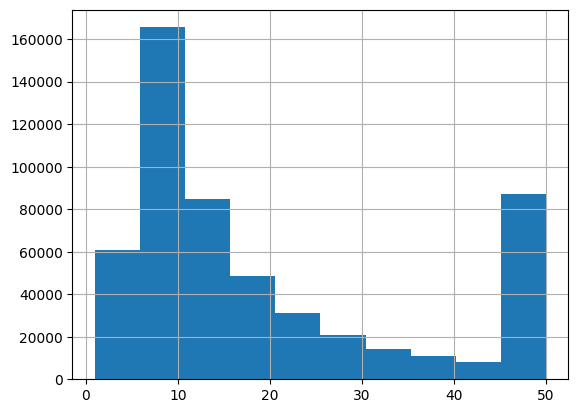

In [94]:
print('Qtde de trajs:', len(lengs_trajs_tt))
print('Comprimento máximo:', lengs_trajs_tt.max())
print('Comprimento médio:', lengs_trajs_tt.mean())
print('Mediana:', lengs_trajs_tt.median())
print('Comprimento mínimo:', lengs_trajs_tt.min())
lengs_trajs_tt.hist()

In [95]:
mv.to_csv('data/tdrive.csv', index=False)

## Convertendo o dataset tdrive.csv pra formato de dataset utilizado no t2vec:

In [96]:
import pandas as pd
import numpy as np
import json as js

In [97]:
df = pd.read_csv('data/tdrive.csv')
df

,id,lon,lat,datetime,tid_time
0,7254,116.21163,39.89811,2008-02-02 23:13:38,21
1,7254,116.21168,39.89804,2008-02-02 23:18:38,21
2,7254,116.21164,39.89806,2008-02-02 23:23:38,21
3,7254,116.21171,39.89782,2008-02-02 23:28:38,21
4,7254,116.21178,39.89770,2008-02-02 23:33:38,21
...,...,...,...,...,...
10383594,10141,117.21510,40.16480,2008-02-08 12:51:05,3163275
10383595,10141,117.21813,40.15331,2008-02-08 12:53:29,3163275
10383596,10141,117.22108,40.15389,2008-02-08 12:56:07,3163275
10383597,10141,117.22113,40.15393,2008-02-08 12:58:31,3163275


In [98]:
df.rename(columns={'tid_time': 'tid'}, inplace=True)
df

,id,lon,lat,datetime,tid
0,7254,116.21163,39.89811,2008-02-02 23:13:38,21
1,7254,116.21168,39.89804,2008-02-02 23:18:38,21
2,7254,116.21164,39.89806,2008-02-02 23:23:38,21
3,7254,116.21171,39.89782,2008-02-02 23:28:38,21
4,7254,116.21178,39.89770,2008-02-02 23:33:38,21
...,...,...,...,...,...
10383594,10141,117.21510,40.16480,2008-02-08 12:51:05,3163275
10383595,10141,117.21813,40.15331,2008-02-08 12:53:29,3163275
10383596,10141,117.22108,40.15389,2008-02-08 12:56:07,3163275
10383597,10141,117.22113,40.15393,2008-02-08 12:58:31,3163275


In [99]:
all_trajs = []
traj = []
all_ids = []

for i in range(len(df)-1):
  aux1 = df.tid[i]
  aux2 = df.tid[i+1]
  if(aux1 == aux2):
    traj.append([df.lon[i],df.lat[i]])
  if(aux1 != aux2):
    traj.append([df.lon[i],df.lat[i]])
    traj = str(traj)
    all_trajs.append(traj)
    traj = []
    all_ids.append(df.tid[i])
  if(i == len(df)-2):
    traj.append([df.lon[i+1],df.lat[i+1]])
    all_trajs.append(traj)
    all_ids.append(df.tid[i+1])

In [100]:
all_trajs = []
traj = []
all_ids = []

for i in range(len(df)-1):
  aux1 = df.tid[i]
  aux2 = df.tid[i+1]
  if(aux1 == aux2):
    traj.append([df.lon[i],df.lat[i]])
  if(aux1 != aux2):
    traj.append([df.lon[i],df.lat[i]])
    traj = str(traj)
    all_trajs.append(traj)
    traj = []
    all_ids.append(df.tid[i])
  if(i == len(df)-2):
    traj.append([df.lon[i+1],df.lat[i+1]])
    all_trajs.append(traj)
    all_ids.append(df.tid[i+1])

for i in range(len(all_trajs)):
  tmp = str(all_trajs[i])
  tmp = tmp.replace(' ','')
  all_trajs[i] = tmp

In [101]:
all_trajs[5]

'[[116.21174,39.89753],[116.21173,39.89753],[116.2118,39.89741],[116.21166,39.89742],[116.21164,39.89739],[116.21174,39.89778],[116.21154,39.89784],[116.21154,39.89782],[116.21145,39.89765],[116.21144,39.89757],[116.21149,39.89764],[116.21165,39.89749],[116.21156,39.89758],[116.21165,39.8975],[116.21125,39.89765],[116.21139,39.89757],[116.21184,39.8974],[116.21176,39.89739],[116.2118,39.8974],[116.21184,39.89746],[116.21176,39.89751],[116.21182,39.89749],[116.21178,39.89759],[116.21179,39.89755],[116.21179,39.89748],[116.21177,39.89746],[116.21182,39.89748],[116.21178,39.89748],[116.21177,39.89746],[116.21174,39.89742]]'

In [102]:
len(all_trajs)

532511

In [103]:
len(all_ids)

532511

In [104]:
l_tmp = []
for i in range(0,len(all_trajs)):
  l_tmp.append('false')

len(l_tmp)

532511

In [105]:
df_tmp = pd.DataFrame(list(zip(all_ids, l_tmp, l_tmp, l_tmp, l_tmp, l_tmp, l_tmp, l_tmp, all_trajs)), columns=['TRIP_ID', 'CALL_TYPE', 'ORIGIN_CALL', 'ORIGIN_STAND', 'TAX_ID', 'TIMESTAMP', 'DAY_TYPE', 'MISSING_DATA', 'POLYLINE'])
df_tmp

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAX_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,21,false,false,false,false,false,false,false,"[[116.21163,39.89811],[116.21168,39.89804],[11..."
1,22,false,false,false,false,false,false,false,"[[116.21183,39.89739],[116.21186,39.89735],[11..."
2,23,false,false,false,false,false,false,false,"[[116.21188,39.89737],[116.2118,39.89743],[116..."
3,26,false,false,false,false,false,false,false,"[[116.21183,39.89786],[116.212,39.89805],[116...."
4,27,false,false,false,false,false,false,false,"[[116.21122,39.89813],[116.21172,39.89769],[11..."
...,...,...,...,...,...,...,...,...,...
532506,3163268,false,false,false,false,false,false,false,"[[116.49875,39.95969],[116.49742,39.96326],[11..."
532507,3163271,false,false,false,false,false,false,false,"[[116.48382,39.97436],[116.47633,39.97806],[11..."
532508,3163274_1,false,false,false,false,false,false,false,"[[116.49705,39.97453],[116.49695,39.97368],[11..."
532509,3163274_2,false,false,false,false,false,false,false,"[[116.88893,40.15263],[116.92498,40.15155],[11..."


In [106]:
df_tmp.to_csv('data/tdrive_formato_t2vec.csv')